In [1]:
# librerias para manejo de datos
use_plotly = False
import scipy
import random
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import figure_factory as ff
from plotly.subplots import make_subplots
if use_plotly:
    import plotly.graph_objects as go
    import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Analisis exploratorio de los datos 

In [2]:
train = pd.read_csv('avila-tr.csv')
test = pd.read_csv('avila-ts.csv')

In [3]:
train.head()

,intercolumnar_distance,upper_margin,lower_margin,exploitation,row_number,modular_ratio,interlinear_spacing,weight,peak_number,modular_ratio_interlinear_spacing,class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430 entries, 0 to 10429
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   intercolumnar_distance             10430 non-null  float64
 1   upper_margin                       10430 non-null  float64
 2   lower_margin                       10430 non-null  float64
 3   exploitation                       10430 non-null  float64
 4   row_number                         10430 non-null  float64
 5   modular_ratio                      10430 non-null  float64
 6   interlinear_spacing                10430 non-null  float64
 7   weight                             10430 non-null  float64
 8   peak_number                        10430 non-null  float64
 9   modular_ratio_interlinear_spacing  10430 non-null  float64
 10  class                              10430 non-null  object 
dtypes: float64(10), object(1)
memory usage: 896.5+ KB


In [5]:
train.describe()

,intercolumnar_distance,upper_margin,lower_margin,exploitation,row_number,modular_ratio,interlinear_spacing,weight,peak_number,modular_ratio_interlinear_spacing
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.005739,0.006370,0.013973,-0.062495,0.061949,0.012914,-0.123985
std,0.991431,3.920868,1.120202,1.020094,0.992053,1.126245,7.084818,12.664409,1.087665,13.445886
min,-3.498799,-2.426761,-3.210528,-7.000000,-4.922215,-7.450257,-711.000000,-463.000000,-5.486218,-1069.000000
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.543569,-0.372457,-0.516428
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.656880,0.500624,0.531406
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,625.000000,44.000000,522.000000


In [6]:
test.isnull().sum()

intercolumnar_distance               0
upper_margin                         0
lower_margin                         0
exploitation                         0
row_number                           0
modular_ratio                        0
interlinear_spacing                  0
weight                               0
peak_number                          0
modular_ratio_interlinear_spacing    0
class                                0
dtype: int64

In [7]:
test.head()

,intercolumnar_distance,upper_margin,lower_margin,exploitation,row_number,modular_ratio,interlinear_spacing,weight,peak_number,modular_ratio_interlinear_spacing,class
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   intercolumnar_distance             10437 non-null  float64
 1   upper_margin                       10437 non-null  float64
 2   lower_margin                       10437 non-null  float64
 3   exploitation                       10437 non-null  float64
 4   row_number                         10437 non-null  float64
 5   modular_ratio                      10437 non-null  float64
 6   interlinear_spacing                10437 non-null  float64
 7   weight                             10437 non-null  float64
 8   peak_number                        10437 non-null  float64
 9   modular_ratio_interlinear_spacing  10437 non-null  float64
 10  class                              10437 non-null  object 
dtypes: float64(10), object(1)
memory usage: 897.1+ KB


In [9]:
test.describe()

,intercolumnar_distance,upper_margin,lower_margin,exploitation,row_number,modular_ratio,interlinear_spacing,weight,peak_number,modular_ratio_interlinear_spacing
count,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000
mean,-0.000852,0.003396,0.005181,-0.003414,-0.006365,-0.008886,0.002350,0.191704,-0.008691,0.685709
std,1.008551,0.955257,0.992430,1.012527,1.007876,1.000360,0.966827,37.412249,1.001240,41.688912
min,-3.498799,-2.426761,-3.210528,-7.000000,-4.922215,-7.450257,-11.935457,-1375.000000,-4.737863,-587.000000
25%,-0.128929,-0.259834,0.064919,-0.527256,0.172340,-0.598658,-0.044076,-0.551204,-0.372457,-0.515079
50%,0.056229,-0.063555,0.217845,0.087408,0.261718,-0.058835,0.220177,0.103541,0.064084,-0.020397
75%,0.204355,0.203385,0.356544,0.627208,0.261718,0.564038,0.446679,0.640281,0.500624,0.526304
max,11.819916,19.470188,7.458681,3.987152,1.066121,12.315569,4.901228,2089.000000,3.213413,3034.000000


In [10]:
train['class'].value_counts(normalize=True)

class
A    0.410930
F    0.188015
E    0.104986
I    0.079674
X    0.050048
H    0.049760
G    0.042761
D    0.033749
Y    0.025503
C    0.009875
W    0.004219
B    0.000479
Name: proportion, dtype: float64

In [11]:
test['class'].value_counts(normalize=True)

class
A    0.410654
F    0.187985
E    0.104915
I    0.079716
X    0.050014
H    0.049823
G    0.042828
D    0.033822
Y    0.025582
C    0.009869
W    0.004312
B    0.000479
Name: proportion, dtype: float64

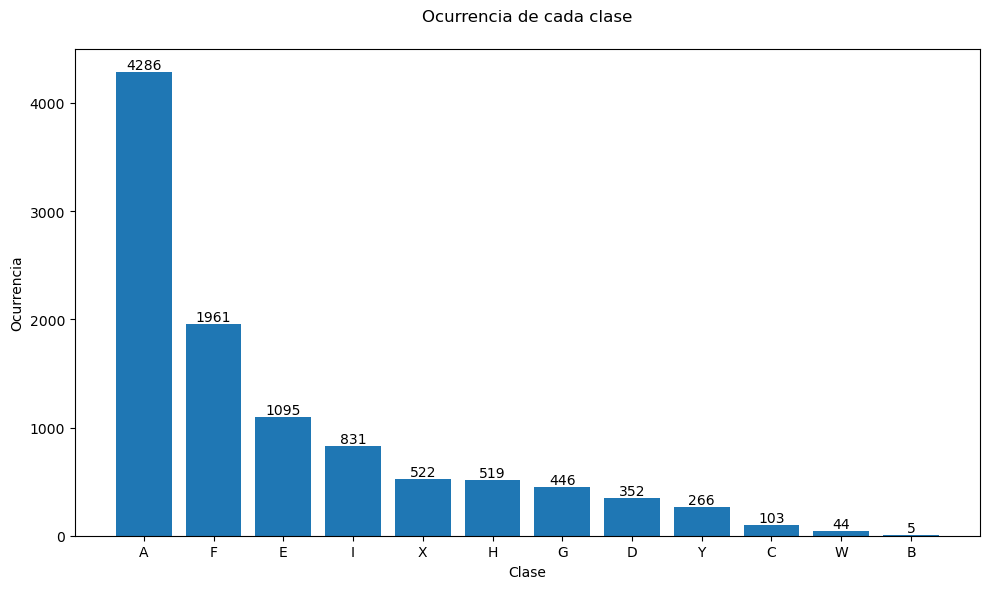

In [12]:
# Obtener conteos de clases
class_counts = train['class'].value_counts()

# Crear figura y ejes
plt.figure(figsize=(10, 6))

# Crear gráfico de barras
bars = plt.bar(class_counts.index, class_counts.values)

# Personalizar el gráfico
plt.title('Ocurrencia de cada clase', pad=20)
plt.xlabel('Clase')
plt.ylabel('Ocurrencia')

# Añadir valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom')

# Ajustar layout
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [13]:
# Identificar las clases con menor cantidad de datos
clases_minoritarias = ['Y', 'C', 'W', 'B']

# Reemplazar las clases minoritarias por una nueva clase 'O'
train['class'] = train['class'].replace(clases_minoritarias, 'O')
test['class'] = test['class'].replace(clases_minoritarias, 'O')

In [14]:
test.describe()

,intercolumnar_distance,upper_margin,lower_margin,exploitation,row_number,modular_ratio,interlinear_spacing,weight,peak_number,modular_ratio_interlinear_spacing
count,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000
mean,-0.000852,0.003396,0.005181,-0.003414,-0.006365,-0.008886,0.002350,0.191704,-0.008691,0.685709
std,1.008551,0.955257,0.992430,1.012527,1.007876,1.000360,0.966827,37.412249,1.001240,41.688912
min,-3.498799,-2.426761,-3.210528,-7.000000,-4.922215,-7.450257,-11.935457,-1375.000000,-4.737863,-587.000000
25%,-0.128929,-0.259834,0.064919,-0.527256,0.172340,-0.598658,-0.044076,-0.551204,-0.372457,-0.515079
50%,0.056229,-0.063555,0.217845,0.087408,0.261718,-0.058835,0.220177,0.103541,0.064084,-0.020397
75%,0.204355,0.203385,0.356544,0.627208,0.261718,0.564038,0.446679,0.640281,0.500624,0.526304
max,11.819916,19.470188,7.458681,3.987152,1.066121,12.315569,4.901228,2089.000000,3.213413,3034.000000


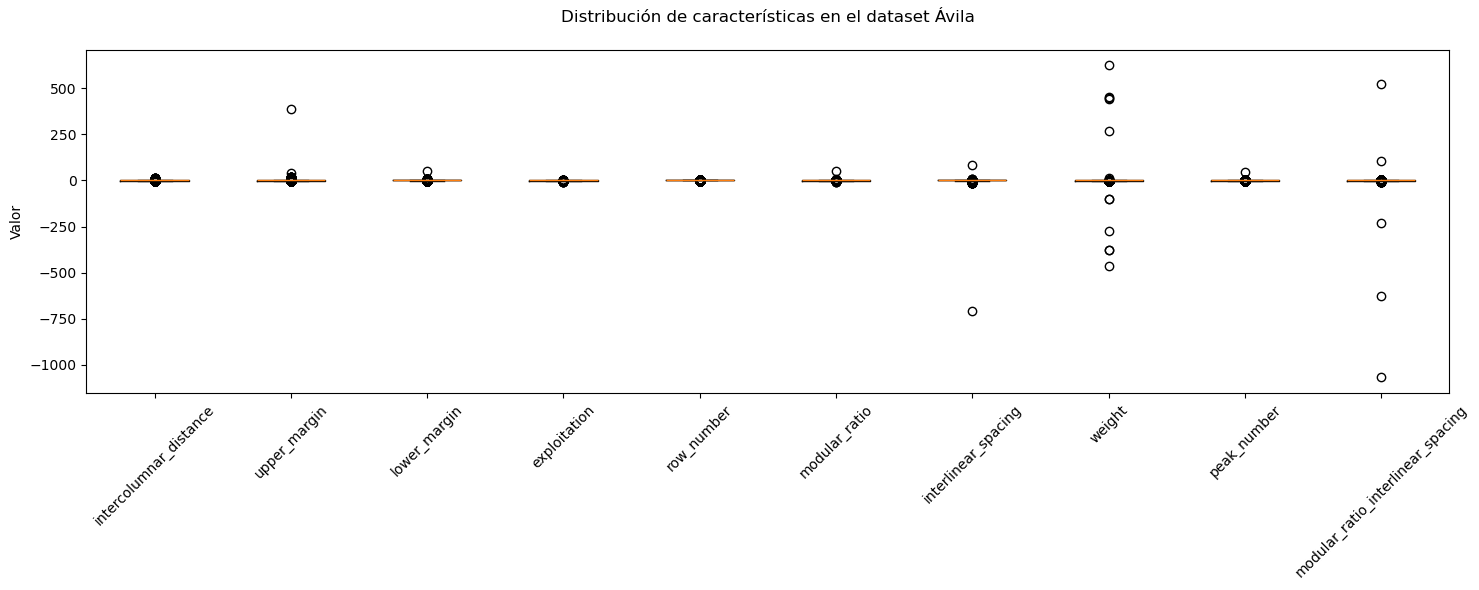

In [15]:
# Crear figura y ejes con un tamaño adecuado para mostrar todas las características
plt.figure(figsize=(15, 6))

# Obtener las columnas numéricas (todas excepto 'class')
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns

# Crear el boxplot
bp = plt.boxplot([train[col] for col in numeric_cols], labels=numeric_cols)

# Personalizar el gráfico
plt.title('Distribución de características en el dataset Ávila', pad=20)
plt.xticks(rotation=45)  # Rotar etiquetas para mejor legibilidad
plt.ylabel('Valor')

# Ajustar márgenes para evitar corte de etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

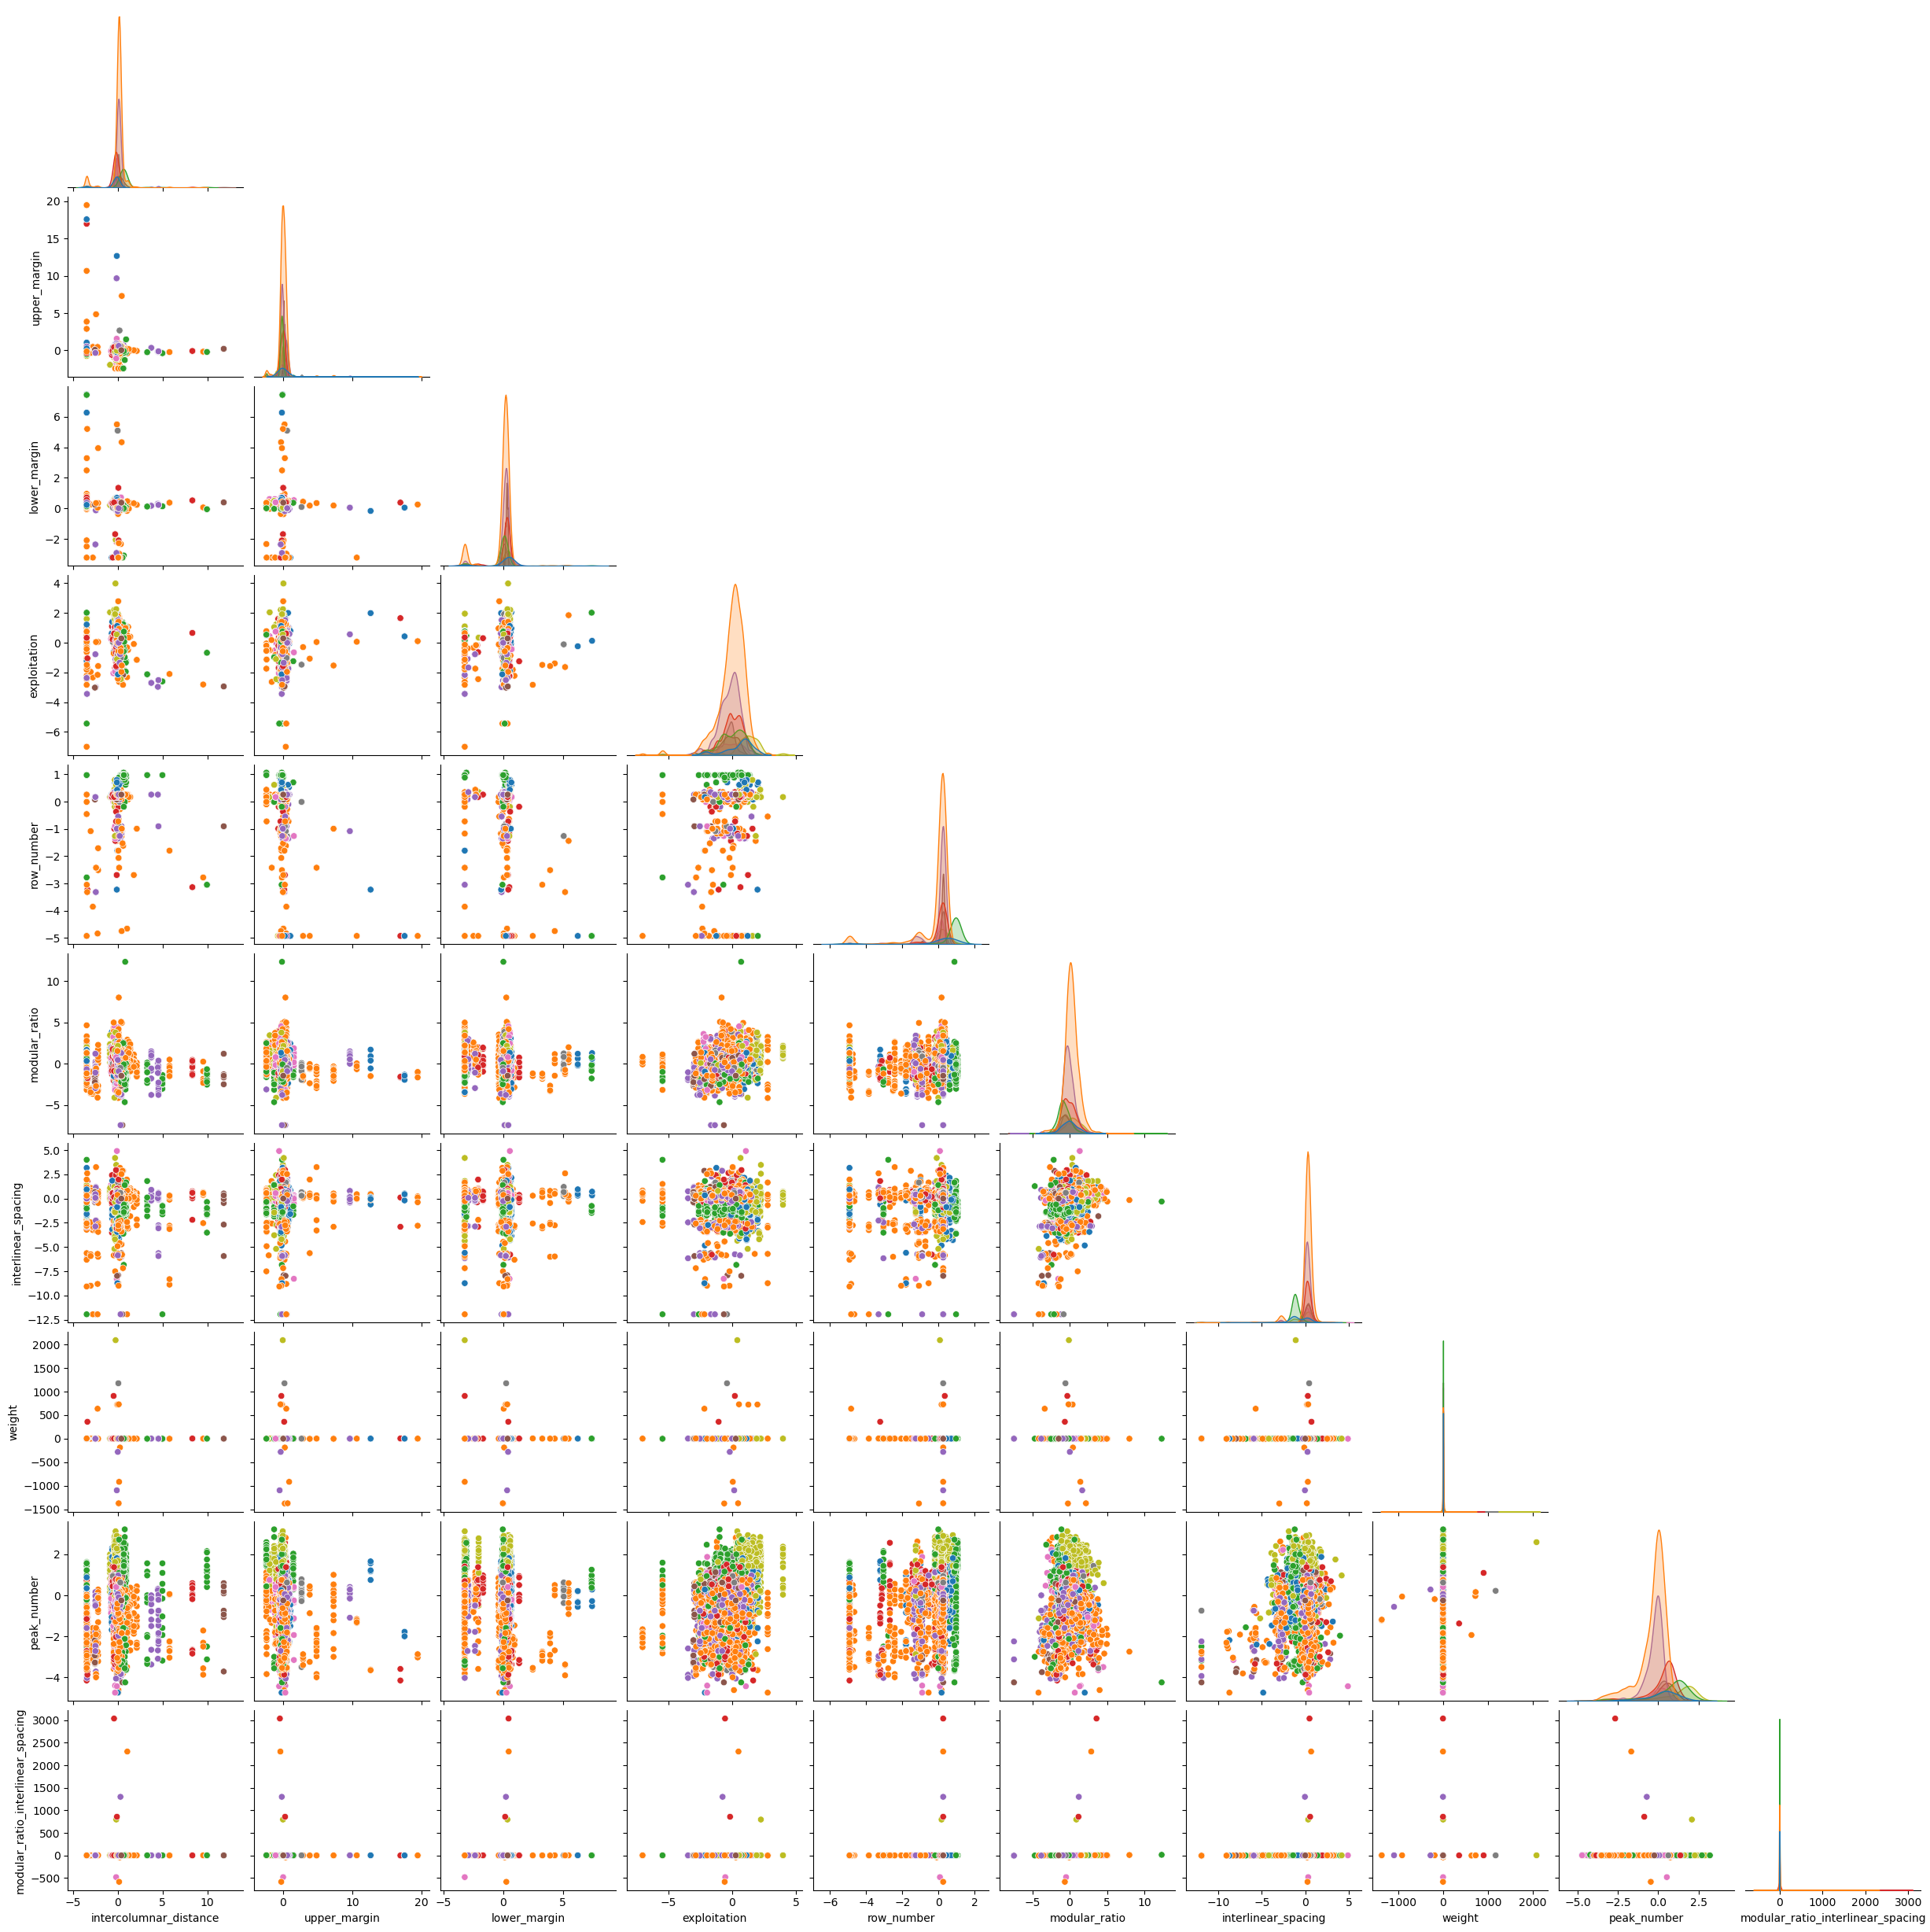

In [16]:
#esto sirve al final 
pairpl = sns.pairplot(test, hue='class', diag_kind='kde', corner=True);
pairpl._legend.remove()

In [17]:
train.corr(numeric_only=True)

,intercolumnar_distance,upper_margin,lower_margin,exploitation,row_number,modular_ratio,interlinear_spacing,weight,peak_number,modular_ratio_interlinear_spacing
intercolumnar_distance,1.000000,-0.037577,0.034473,-0.052995,0.451966,-0.044663,0.002956,-0.001249,0.059427,-0.005668
upper_margin,-0.037577,1.000000,0.414578,0.001716,-0.067759,0.424384,0.107299,0.003049,0.349011,-0.001648
lower_margin,0.034473,0.414578,1.000000,0.151398,0.011333,0.132723,0.051167,0.002244,0.193194,-0.017854
exploitation,-0.052995,0.001716,0.151398,1.000000,0.111660,0.252882,0.026307,0.033411,0.283756,0.047837
row_number,0.451966,-0.067759,0.011333,0.111660,1.000000,0.039824,0.013689,-0.001106,0.274883,0.009772
modular_ratio,-0.044663,0.424384,0.132723,0.252882,0.039824,1.000000,0.107955,-0.009616,0.214207,0.070395
interlinear_spacing,0.002956,0.107299,0.051167,0.026307,0.013689,0.107955,1.000000,0.000841,0.052826,0.004771
weight,-0.001249,0.003049,0.002244,0.033411,-0.001106,-0.009616,0.000841,1.000000,0.055177,0.000693
peak_number,0.059427,0.349011,0.193194,0.283756,0.274883,0.214207,0.052826,0.055177,1.000000,0.013154
modular_ratio_interlinear_spacing,-0.005668,-0.001648,-0.017854,0.047837,0.009772,0.070395,0.004771,0.000693,0.013154,1.000000


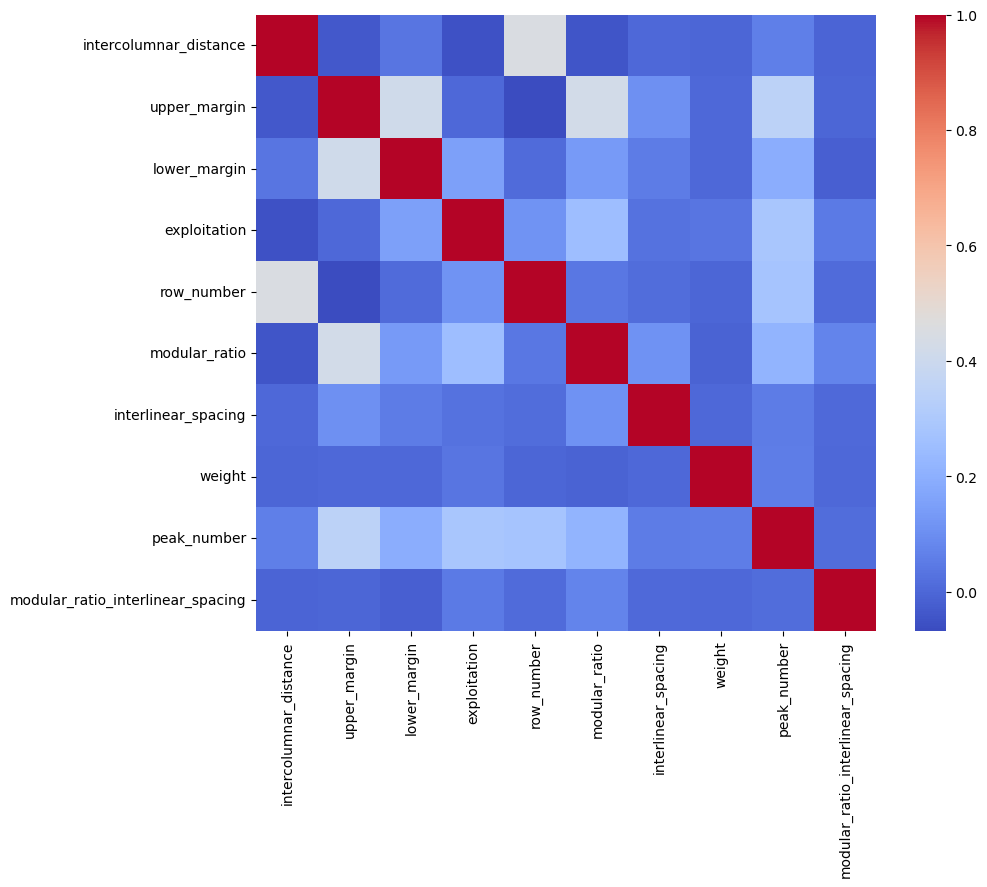

In [18]:
corr = train.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.show()

In [19]:
train.groupby("class")["weight"].mean().sort_values()

class
F   -0.670786
D   -0.114703
H   -0.082314
G   -0.049023
E    0.061795
A    0.098151
O    0.145366
I    0.677448
X    1.828419
Name: weight, dtype: float64

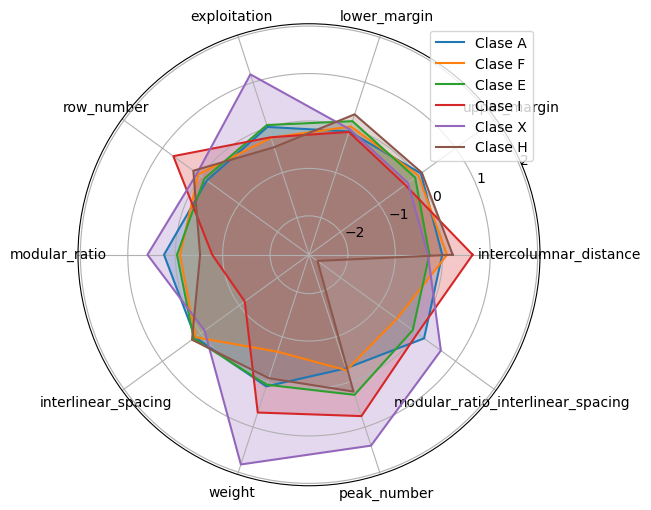

In [20]:
# Ejemplo comparando dos clases
# Calcular la media de las características agrupadas por clase
class_means = train.groupby('class').mean()
clases = ["A","F","E","I","X", "H"]
vars = class_means.columns
angles = np.linspace(0, 2*np.pi, len(vars), endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
for c in clases:
    valores = class_means.loc[c].values
    valores = np.concatenate((valores,[valores[0]]))  # cerrar círculo
    ax.plot(angles + [angles[0]], valores, label=f"Clase {c}")
    ax.fill(angles + [angles[0]], valores, alpha=0.25)
ax.set_xticks(angles)
ax.set_xticklabels(vars, rotation=20)
ax.legend()
plt.show()

## K-means

In [21]:
# Añadir esta celda para el manejo de outliers
print("Forma del dataset de entrenamiento antes de eliminar outliers:", train.shape)

# Seleccionar solo columnas numéricas para el tratamiento de outliers
numeric_cols = train.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar los outliers
    train = train[(train[col] >= lower_bound) & (train[col] <= upper_bound)]

print("Forma del dataset de entrenamiento después de eliminar outliers:", train.shape)

Forma del dataset de entrenamiento antes de eliminar outliers: (10430, 11)
Forma del dataset de entrenamiento después de eliminar outliers: (5651, 11)


In [22]:
# Antes de aplicar K-Means
X_train = train.drop('class', axis=1)
y_train = train['class']

X_test = test.drop('class', axis=1)
y_test = test['class']

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

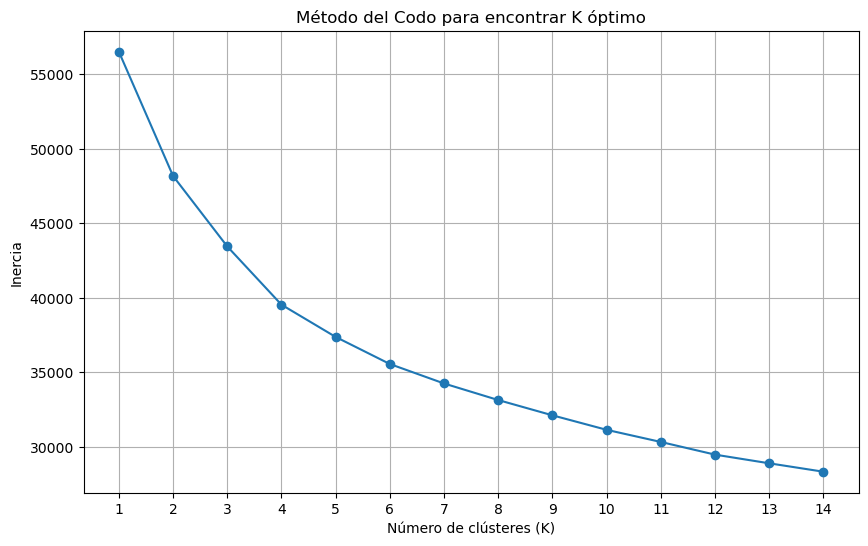

In [24]:
inertia = []
k_range = range(1, 15) # Probaremos con K de 1 a 14

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo para encontrar K óptimo')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Para K=2, la puntuación de silueta es: 0.1401
Para K=3, la puntuación de silueta es: 0.1250
Para K=4, la puntuación de silueta es: 0.1278
Para K=5, la puntuación de silueta es: 0.1231
Para K=6, la puntuación de silueta es: 0.1235
Para K=7, la puntuación de silueta es: 0.1175
Para K=8, la puntuación de silueta es: 0.1103
Para K=9, la puntuación de silueta es: 0.1031
Para K=10, la puntuación de silueta es: 0.1131
Para K=11, la puntuación de silueta es: 0.1063
Para K=12, la puntuación de silueta es: 0.1078
Para K=13, la puntuación de silueta es: 0.1078
Para K=14, la puntuación de silueta es: 0.1037


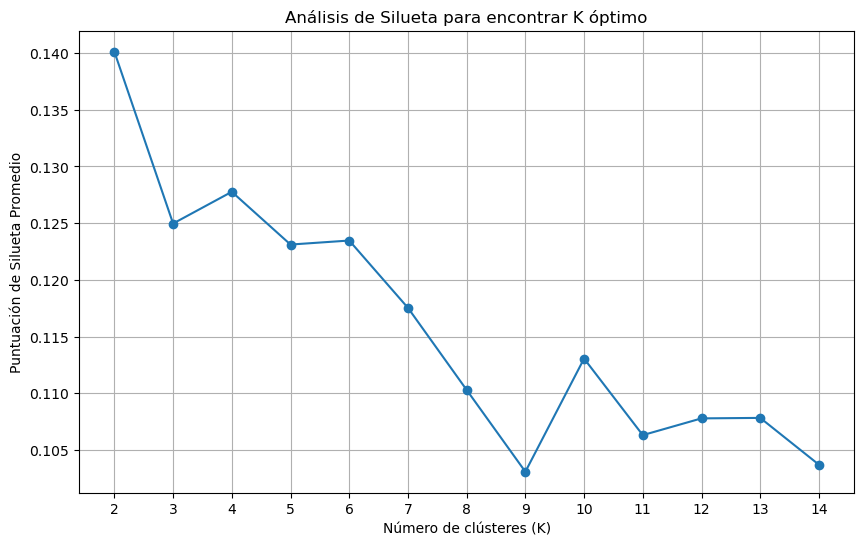

In [25]:
silhouette_scores = []
# El rango de K debe empezar en 2, ya que la puntuación de silueta no se puede calcular para un solo clúster.
k_range = range(2, 15) 

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    # Usamos fit_predict para obtener las etiquetas de los clústeres directamente
    cluster_labels = kmeans.fit_predict(X_train_scaled)
    
    # Calculamos la puntuación de silueta promedio
    score = silhouette_score(X_train_scaled, cluster_labels)
    silhouette_scores.append(score)
    print(f"Para K={k}, la puntuación de silueta es: {score:.4f}")

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Análisis de Silueta para encontrar K óptimo')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Puntuación de Silueta Promedio')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [40]:
# Añadir esta celda para entrenar el modelo final
optimal_k = 4 # Reemplaza con el valor que encontraste
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
train_clusters = kmeans_final.fit_predict(X_train_scaled)

# Añadir los clústeres al DataFrame original para análisis
train_with_clusters = train.copy()
train_with_clusters['cluster'] = train_clusters

pd.Series(train_with_clusters['cluster']).value_counts().sort_index()

cluster
0    1510
1    1377
2    1314
3    1450
Name: count, dtype: int64

In [27]:
# Crear una tabla de contingencia
contingency_table = pd.crosstab(train_with_clusters['class'], train_with_clusters['cluster'])

print("Tabla de Contingencia (Clases vs. Clústeres):")
contingency_table


Tabla de Contingencia (Clases vs. Clústeres):


cluster,0,1,2,3
class,,,,
A,469,547,776,673
D,37,73,22,0
E,89,414,127,56
F,637,153,276,375
G,10,13,49,285
H,212,98,55,59
O,46,26,6,0
X,10,53,3,2


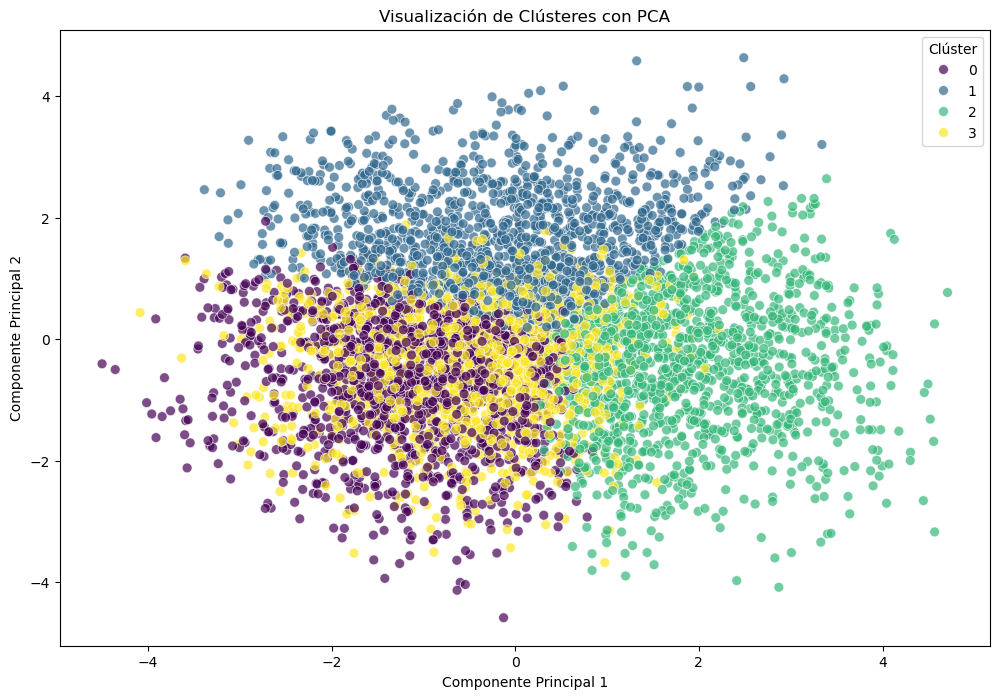

In [28]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=train_clusters, palette='viridis', s=50, alpha=0.7)
plt.title('Visualización de Clústeres con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clúster')
plt.show()

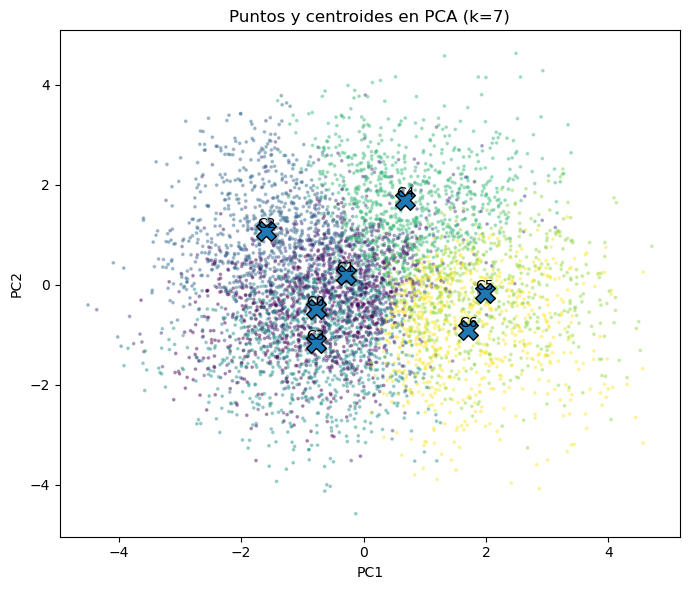

In [43]:
# Puntos coloreados por clúster
plt.figure(figsize=(7,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1],
            c=train_labels, s=3, alpha=0.35)
# Centroides en PC1–PC2
C2 = kmeans.cluster_centers_[:, :2]
plt.scatter(C2[:,0], C2[:,1], s=200, marker='X', edgecolor='k')
for i, (x, y) in enumerate(C2):
    plt.text(x, y, f"C{i}", fontsize=10, ha='center', va='bottom')

plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title(f"Puntos y centroides en PCA (k={kmeans.n_clusters})")
plt.tight_layout()
plt.show()

### PCA

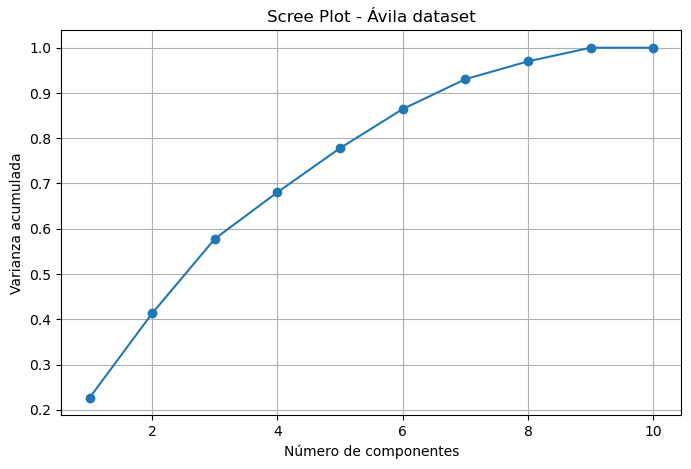

In [29]:
#
# PCA con todos los componentes
pca_full = PCA(n_components=10)
pca_full.fit(X_train_scaled)

# Varianza explicada
var_exp = pca_full.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

# Graficar
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), cum_var_exp, marker='o')
plt.xlabel("Número de componentes")
plt.ylabel("Varianza acumulada")
plt.title("Scree Plot - Ávila dataset")
plt.grid(True)
plt.show()

In [30]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Varianza explicada individual:", pca.explained_variance_ratio_)
print("Varianza acumulada:", sum(pca.explained_variance_ratio_))

Varianza explicada individual: [0.22662563 0.18652874 0.16459159 0.10296578 0.09745905]
Varianza acumulada: 0.7781707805921335


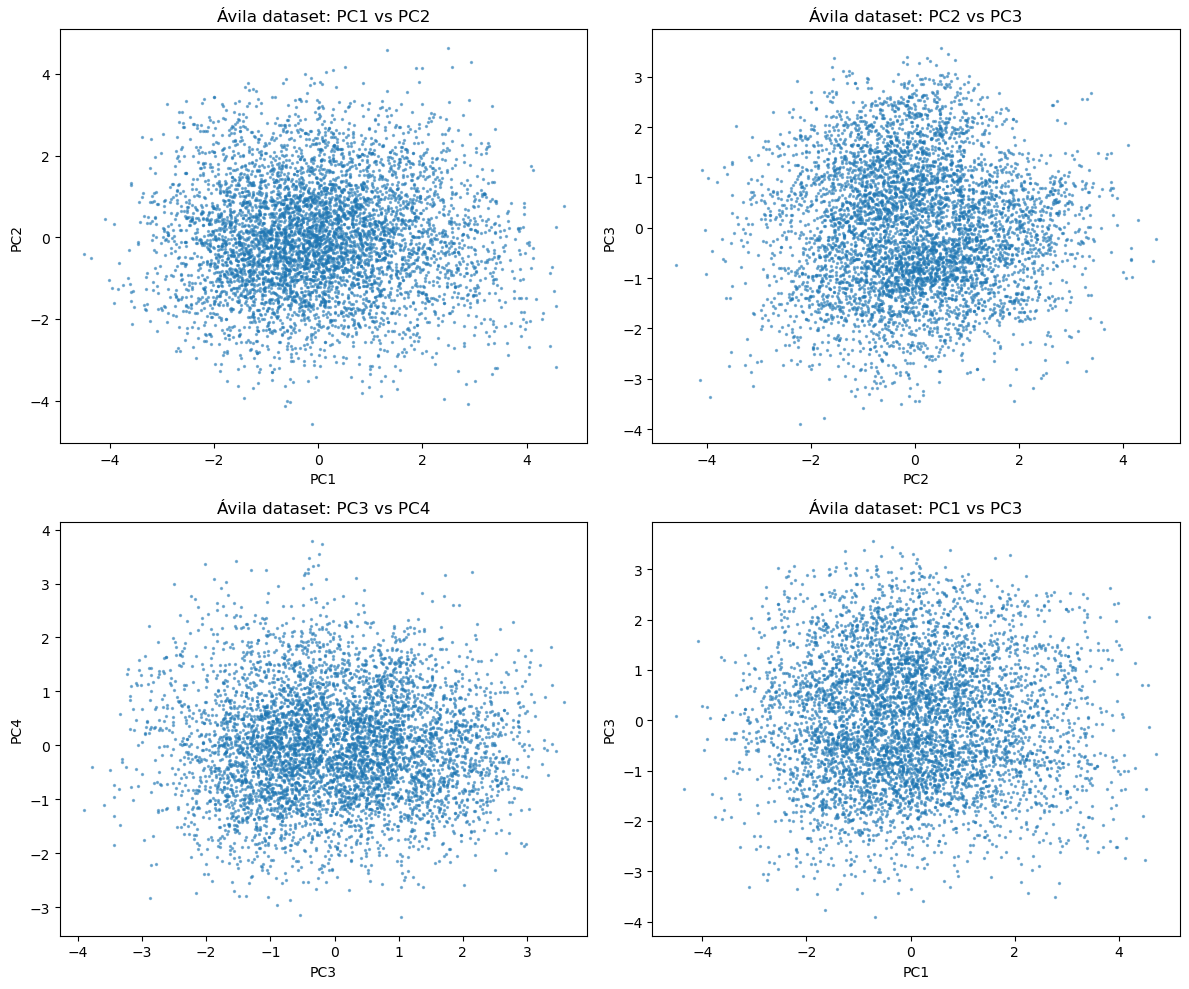

In [31]:
# Lista de pares de componentes a graficar
pairs = [(0,1), (1,2), (2,3), (0,2)]

plt.figure(figsize=(12,10))

for i, (a,b) in enumerate(pairs, 1):
    plt.subplot(2,2,i)
    plt.scatter(X_train_pca[:,a], X_train_pca[:,b], s=2, alpha=0.5)
    plt.xlabel(f"PC{a+1}")
    plt.ylabel(f"PC{b+1}")
    plt.title(f"Ávila dataset: PC{a+1} vs PC{b+1}")

plt.tight_layout()
plt.show()

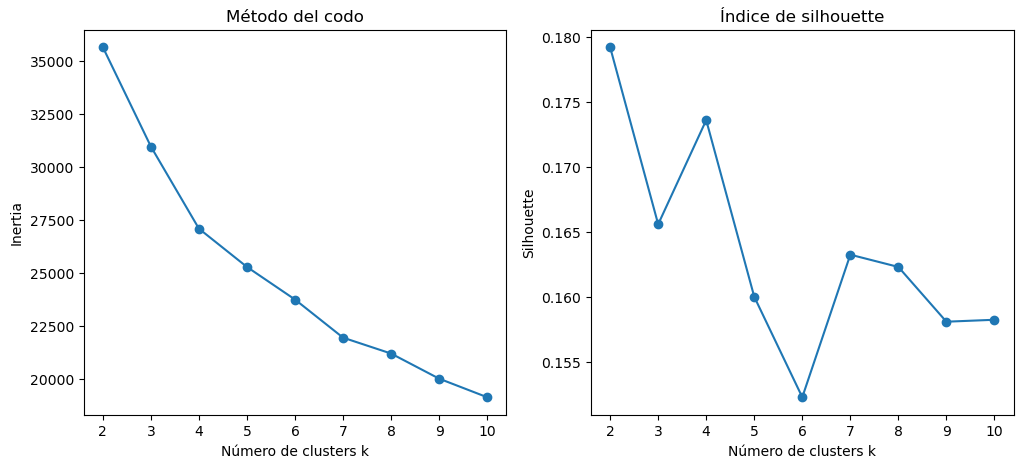

In [32]:

# Probar varios valores de k
inertias = []
silhouettes = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train_pca)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_train_pca, labels))

# Gráfico del codo (inertia)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, inertias, marker='o')
plt.xlabel("Número de clusters k")
plt.ylabel("Inertia")
plt.title("Método del codo")

# Gráfico del silhouette
plt.subplot(1,2,2)
plt.plot(K, silhouettes, marker='o')
plt.xlabel("Número de clusters k")
plt.ylabel("Silhouette")
plt.title("Índice de silhouette")
plt.show()

In [33]:
# 1) Buscar k óptimo en un rango razonable
cand_k = range(5, 9)  # p.ej., 3–8
inertias, silhouettes = [], []

for k in cand_k:
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    labels = km.fit_predict(X_train_pca)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_train_pca, labels))

# Elegir k por mejor silhouette dentro del rango
best_k = cand_k[int(np.argmax(silhouettes))]
best_k, list(zip(cand_k, inertias, silhouettes))

(7,
 [(5, 25270.637612045746, 0.16000196530555666),
  (6, 23733.95746085052, 0.1522769824729375),
  (7, 21936.25579021739, 0.1632364792112118),
  (8, 21186.520926504534, 0.16229325763286043)])

In [34]:
# 2) Ajuste final con k óptimo
kmeans = KMeans(n_clusters=best_k, n_init='auto', random_state=42)
train_labels = kmeans.fit_predict(X_train_pca)

# 3) Tamaños de clúster
pd.Series(train_labels).value_counts().sort_index()

0     993
1     634
2     797
3    1030
4     867
5     607
6     723
Name: count, dtype: int64

In [35]:
# 4) Caracterizar clústeres en variables originales
#    – promedio por clúster en el espacio original (sin estandarizar)
train_df = pd.DataFrame(X_train, columns=[f'feat_{i+1}' for i in range(X_train.shape[1])])
train_df['cluster'] = train_labels
cluster_profile = train_df.groupby('cluster').mean().round(3)
cluster_profile

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10
cluster,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# 5) Centros de clúster interpretables:
#    (a) centroide en PCA-space
centroids_pca = kmeans.cluster_centers_

#    (b) llevar centroides de vuelta a espacio estandarizado y luego original
#        (requiere objetos 'pca' y 'scaler' ya ajustados con n_components=5)
centroids_std = pca.inverse_transform(centroids_pca)          # vuelve a 10D estandarizado
centroids_orig = scaler.inverse_transform(centroids_std)      # vuelve a escala original

centroids = pd.DataFrame(centroids_orig,
                         columns=[f'feat_{i+1}' for i in range(X_train.shape[1])])
centroids.round(3)

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10
0,0.103,0.378,0.058,0.038,0.251,-0.332,0.304,0.326,0.174,-0.342
1,0.058,0.030,0.271,-0.030,0.134,-0.059,0.233,0.156,0.165,-0.057
2,-0.047,-0.070,0.318,0.146,0.239,-0.637,0.286,0.734,0.567,-0.605
3,0.123,-0.139,0.300,-0.502,0.251,-0.463,0.213,-0.331,-0.172,-0.411
4,-0.131,-0.048,0.275,0.826,0.247,0.390,0.218,0.656,0.396,0.356
5,-0.005,-0.257,0.332,0.256,0.239,0.845,0.248,-0.443,-0.295,0.746
6,0.097,0.234,0.083,0.213,0.248,0.770,0.391,-0.338,-0.273,0.599


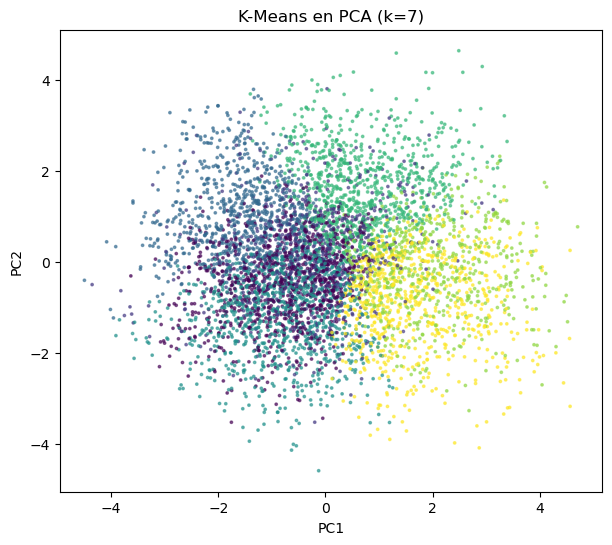

In [37]:

plt.figure(figsize=(7,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=train_labels, s=3, alpha=0.6)
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.title(f"K-Means en PCA (k={best_k})")
plt.show()